## Written by rajeev

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as tb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas_datareader.data as web
import datetime
end = datetime.datetime.now()
begin = end - pd.DateOffset(365*5)
st=begin.strftime('%Y-%m-%d')
ed=end.strftime('%Y-%m-%d')
df = web.get_data_yahoo("^NSEI",st,ed)

In [10]:
df.shape

(1222, 6)

In [36]:
df = df.dropna()
df = df[df['Volume'] !=0]

In [37]:
df['Year'] = df.index[:].strftime('%Y') 

In [64]:
# To capture Momentum
df['RSI'] = tb.RSI(np.array(df['Close']), timeperiod=14)

In [65]:
# To capture Volatility
df['ATR'] =tb.ATR(np.array(df['High']), np.array(df['Low']), np.array(df['Close']), timeperiod=14)

In [66]:
# To capture the long term, Mid term and short term trend
df['EMA5'] = tb.EMA(np.array(df['Close']), timeperiod=5)
df['EMA15'] = tb.EMA(np.array(df['Close']), timeperiod=15)
df['EMA30'] = tb.EMA(np.array(df['Close']), timeperiod=30)
df['EMA50'] = tb.EMA(np.array(df['Close']), timeperiod=50)

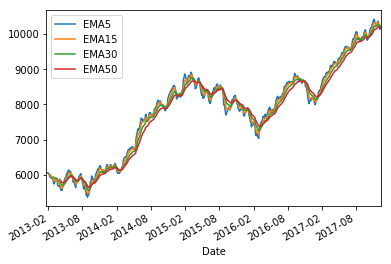

In [67]:
df.loc[:, ('EMA5', 'EMA15', 'EMA30', 'EMA50')].plot()

## Splitting the Data into train and test

In [85]:
dftrain = df[(df['Year'] == '2013') | (df['Year'] == '2014') | (df['Year'] == '2015')]
dftest = df[(df['Year'] == '2016') | (df['Year'] == '2017')]

In [89]:
dftrain1 = dftrain.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Year'], axis=1)
dftest1 = dftest.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Year'], axis=1)

In [121]:
dftrain1 = dftrain1.dropna()

In [98]:
dftrain1.index

DatetimeIndex(['2013-04-02', '2013-04-03', '2013-04-04', '2013-04-05',
               '2013-04-08', '2013-04-09', '2013-04-10', '2013-04-11',
               '2013-04-12', '2013-04-15',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name=u'Date', length=670, freq=None)

In [99]:
df['Log_returns'] = np.log(df['Close']/ df['Close'].shift())

In [120]:
# Definition of Target Variable
df['Target'] = 0
df['Target'][df['Log_returns'] > 0.005] = 1
df['Target'][df['Log_returns'] < -0.005] = -1

C:\Users\RAJEEV-PC\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RAJEEV-PC\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
df['Target'].value_counts()

 0    607
 1    321
-1    270
Name: Target, dtype: int64

In [124]:
dftrain_y = df['Target'][dftrain1.index]
dftest_y = df['Target'][dftest1.index]

In [125]:
dftrain1.shape, dftest1.shape, dftrain_y.shape, dftest_y.shape

((670, 7), (479, 7), (670L,), (479L,))

## Model Building

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [127]:
# Logistic Regression Model
lg = LogisticRegression().fit(dftrain1, dftrain_y)

In [137]:
# Preformance Metrics of Logistic Regression Model
print 'Accuracy Score for train {:.2f}'.format(accuracy_score(y_true=dftrain_y, y_pred=lg.predict(dftrain1)))
print 'Accuracy Score for test {:.2f}'.format(accuracy_score(y_true=dftest_y, y_pred=lg.predict(dftest1)))
print 'Classification report for train'
print classification_report(dftrain_y, lg.predict(dftrain1))
print 'Classification report for train'
print classification_report(y_true=dftrain_y, y_pred=lg.predict(dftrain1))

Accuracy Score for train 0.54
Accuracy Score for test 0.58
Classification report for train
             precision    recall  f1-score   support

         -1       0.57      0.28      0.38       162
          0       0.54      0.78      0.64       313
          1       0.51      0.36      0.43       195

avg / total       0.54      0.54      0.52       670

Classification report for train
             precision    recall  f1-score   support

         -1       0.57      0.28      0.38       162
          0       0.54      0.78      0.64       313
          1       0.51      0.36      0.43       195

avg / total       0.54      0.54      0.52       670



In [214]:
# Support Vector Machine
svm = SVC(kernel='rbf', C=0.65, gamma=0.20).fit(dftrain1, dftrain_y)

In [216]:
# Performance Metrics of Support vector Machine
print 'Accuracy Score for train {:.2f}'.format(accuracy_score(y_true=dftrain_y, y_pred=svm.predict(dftrain1)))
print 'Accuracy Score for test {:.2f}'.format(accuracy_score(y_true=dftest_y, y_pred=svm.predict(dftest1)))
print 'Classification report for train'
print classification_report(dftrain_y, svm.predict(dftrain1))
print 'Classification report for train'
print classification_report(y_true=dftrain_y, y_pred=svm.predict(dftrain1))

Accuracy Score for train 0.76
Accuracy Score for test 0.56
Classification report for train
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       162
          0       0.66      1.00      0.79       313
          1       1.00      1.00      1.00       195

avg / total       0.60      0.76      0.66       670

Classification report for train
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       162
          0       0.66      1.00      0.79       313
          1       1.00      1.00      1.00       195

avg / total       0.60      0.76      0.66       670



In [153]:
# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=10).fit(dftrain1, dftrain_y)

In [154]:
# Preformance Metrics of Decision Tree Model
print 'Accuracy Score for train {:.2f}'.format(accuracy_score(y_true=dftrain_y, y_pred=dt.predict(dftrain1)))
print 'Accuracy Score for test {:.2f}'.format(accuracy_score(y_true=dftest_y, y_pred=dt.predict(dftest1)))
print 'Classification report for train'
print classification_report(dftrain_y, dt.predict(dftrain1))
print 'Classification report for train'
print classification_report(y_true=dftrain_y, y_pred=dt.predict(dftrain1))

Accuracy Score for train 0.59
Accuracy Score for test 0.48
Classification report for train
             precision    recall  f1-score   support

         -1       0.55      0.45      0.50       162
          0       0.59      0.86      0.70       313
          1       0.69      0.28      0.40       195

avg / total       0.61      0.59      0.56       670

Classification report for train
             precision    recall  f1-score   support

         -1       0.55      0.45      0.50       162
          0       0.59      0.86      0.70       313
          1       0.69      0.28      0.40       195

avg / total       0.61      0.59      0.56       670



In [165]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=6).fit(dftrain1, dftrain_y)

In [166]:
# Preformance Metrics of Random Forest Model
print 'Accuracy Score for train {:.2f}'.format(accuracy_score(y_true=dftrain_y, y_pred=rf.predict(dftrain1)))
print 'Accuracy Score for test {:.2f}'.format(accuracy_score(y_true=dftest_y, y_pred=rf.predict(dftest1)))
print 'Classification report for train'
print classification_report(dftrain_y, rf.predict(dftrain1))
print 'Classification report for train'
print classification_report(y_true=dftrain_y, y_pred=rf.predict(dftrain1))

Accuracy Score for train 0.68
Accuracy Score for test 0.59
Classification report for train
             precision    recall  f1-score   support

         -1       0.82      0.52      0.64       162
          0       0.62      0.94      0.74       313
          1       0.83      0.38      0.53       195

avg / total       0.73      0.68      0.65       670

Classification report for train
             precision    recall  f1-score   support

         -1       0.82      0.52      0.64       162
          0       0.62      0.94      0.74       313
          1       0.83      0.38      0.53       195

avg / total       0.73      0.68      0.65       670



In [180]:
# Adaboost Model
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5).fit(dftrain1, dftrain_y)

In [181]:
# Preformance Metrics of Adaboost Model
print 'Accuracy Score for train {:.2f}'.format(accuracy_score(y_true=dftrain_y, y_pred=ada.predict(dftrain1)))
print 'Accuracy Score for test {:.2f}'.format(accuracy_score(y_true=dftest_y, y_pred=ada.predict(dftest1)))
print 'Classification report for train'
print classification_report(dftrain_y, ada.predict(dftrain1))
print 'Classification report for train'
print classification_report(y_true=dftrain_y, y_pred=ada.predict(dftrain1))

Accuracy Score for train 0.61
Accuracy Score for test 0.52
Classification report for train
             precision    recall  f1-score   support

         -1       0.62      0.43      0.51       162
          0       0.59      0.78      0.67       313
          1       0.66      0.49      0.56       195

avg / total       0.62      0.61      0.60       670

Classification report for train
             precision    recall  f1-score   support

         -1       0.62      0.43      0.51       162
          0       0.59      0.78      0.67       313
          1       0.66      0.49      0.56       195

avg / total       0.62      0.61      0.60       670



# Way Forward

>1. Signal, Equity Curve and Maximum Draw Down can be plotted to understand the strategy returns
>2. Model can be improved further, by using proper feature engineering and algorithm like Xgboost model